In [0]:
from keras.preprocessing.image import ImageDataGenerator

#paths definition
outPutToSave = "D:/GoogleDrive/DatasetsMachineLearning/FirstTaskModel/"  #path where save the model and plots images
train_dir = "D:/GoogleDrive/Machine_Learning_Project-Classification+SRCNN/firstTaskData/training"  #change with your path (sharedFolder->firstTaskData->training
validation_dir = "D:/GoogleDrive/Machine_Learning_Project-Classification+SRCNN/firstTaskData/validation"  #change with your path (sharedFolder->firstTaskData->validation


In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
random = True
seed = 42
shape = (255, 255)
shapeWithChannels = (255, 255, 3)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=shape,
                                                    batch_size=10,
                                                    class_mode='binary', shuffle=random,
                                                    seed=seed)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=shape,
    batch_size=10,
    class_mode='binary', shuffle=random,
    seed=seed)

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[0:10])
    break


Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
data batch shape: (10, 255, 255, 3)
labels batch shape: (10,)
[0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


In [0]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), input_shape=shapeWithChannels))
model.add(layers.Conv2D(16, (4, 4), activation='relu'))
model.add(layers.GlobalMaxPool2D())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)
model.save(outPutToSave+'firstTaskModel.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 253, 253, 8)       224       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 250, 250, 16)      2064      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,865
Trainable params: 2,865
Non-trainable params: 0
_________________________________________________________________


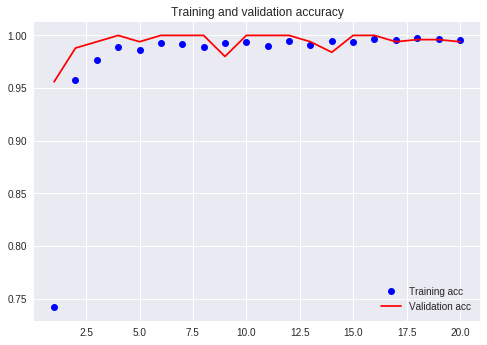

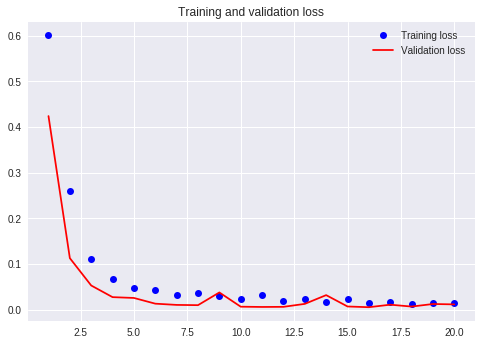

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b',color='red', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig(outPutToSave+'bestResultWith2865ParameterAccuracy.png')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='red', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig(outPutToSave+'result.png')
plt.show()

In [0]:
model.save(outPutToSave+'modelParameter.h5')
model.save_weights(outPutToSave+"modelWeights.h5")
model_json = model.to_json()
with open(outPutToSave+"modelParameter.json", "w") as json_file:
    json_file.write(model_json)

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file=outPutToSave+'resultParameterModel.png', show_shapes=True, show_layer_names=True)

In [0]:
from contextlib import redirect_stdout

with open(outPutToSave + "modelParameter.txt", "w") as model_summary:
    with redirect_stdout(model_summary):
        model.summary()
